# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla_{}Q(w) = 2X^T \left( Xw -y\right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [1]:
from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent


class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        # TODO: fit weights to x and y
        self.loss_history.append(self.calc_loss(x, y))
        
        for _ in range(self.max_iter):
            
            gradient = self.descent.calc_gradient(x, y)
            
            difference = self.descent.update_weights(gradient)
            
            self.loss_history.append(self.calc_loss(x, y))
            
            if np.isnan(difference).any() or difference.dot(difference) < self.tolerance:
                break
        return self
        #raise NotImplementedError('LinearRegression fit function not implemented')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)


## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

https://contest.yandex.ru/contest/54610/problems/

<img src="Screenshot_1.png" width="400">

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [10]:
data.notRepairedDamage.nunique()

2

In [11]:
data.gearbox.nunique()

2

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [12]:
categorical = ['brand', 'model', 'vehicleType']
numeric = ['fuelType', 'powerPS', 'kilometer', 'autoAgeMonths', 'price']
other = ['notRepairedDamage', 'gearbox'] #бинарные переменные

# YOUR CODE (EDA):

Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

<Axes: xlabel='price', ylabel='Count'>

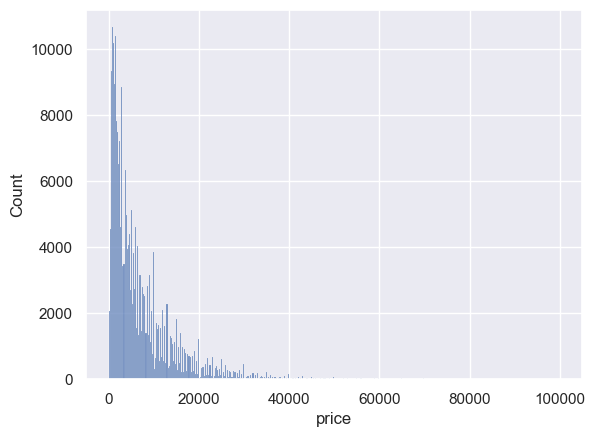

In [13]:
sns.histplot(data.price)

In [14]:
data['log_price'] = np.log(data['price'])
data['log_price']

0          7.313220
1          8.188689
2          6.476972
3          7.696213
4          7.600902
            ...    
241185     8.974618
241186     8.070906
241187     7.089243
241188     9.126959
241189    10.274706
Name: log_price, Length: 241190, dtype: float64

<Axes: xlabel='log_price', ylabel='Count'>

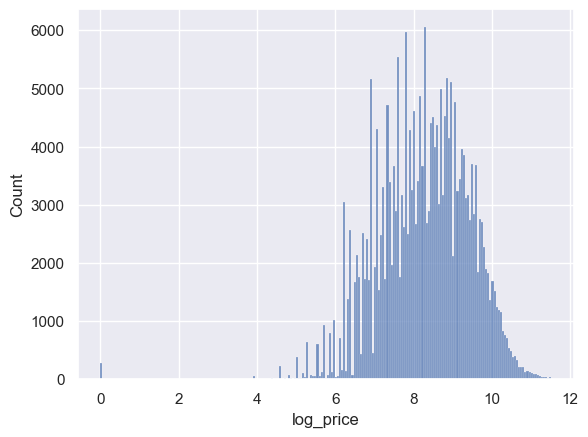

In [15]:
sns.histplot(data.log_price)

Логарифм цены лучше, так как он снижает разброс в данных
Видно, что есть выбросы когда логарифм цены меньше 5, уберем их

In [16]:
data = data.drop(data[data.log_price < 5].index, axis=0)


Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240411 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              240411 non-null  object 
 1   model              240411 non-null  object 
 2   vehicleType        240411 non-null  object 
 3   gearbox            240411 non-null  object 
 4   fuelType           240411 non-null  object 
 5   notRepairedDamage  240411 non-null  object 
 6   powerPS            240411 non-null  int64  
 7   kilometer          240411 non-null  int64  
 8   autoAgeMonths      240411 non-null  int64  
 9   price              240411 non-null  int64  
 10  log_price          240411 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 22.0+ MB


### Проанализируем количественные признаки

C:\Users\Spacelight\AppData\Local\Temp\ipykernel_2268\2182687081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upp_mat = np.triu(data.corr())
C:\Users\Spacelight\AppData\Local\Temp\ipykernel_2268\2182687081.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()[['log_price']], vmin=-1, vmax=+1, annot=True, cmap="coolwarm")


<Axes: >

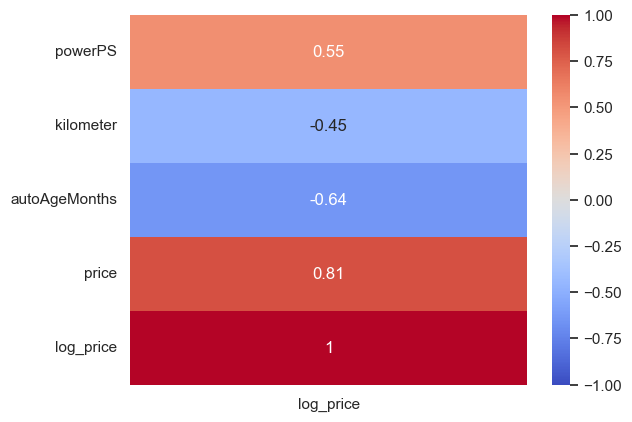

In [18]:
upp_mat = np.triu(data.corr())

sns.heatmap(data.corr()[['log_price']], vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

Видно, что лошадинные силы положительно коррелируют с ценой, а количество пробега и возраст машины, наоборот отрицательно, что ожидаемо

Text(0, 0.5, 'Количество')

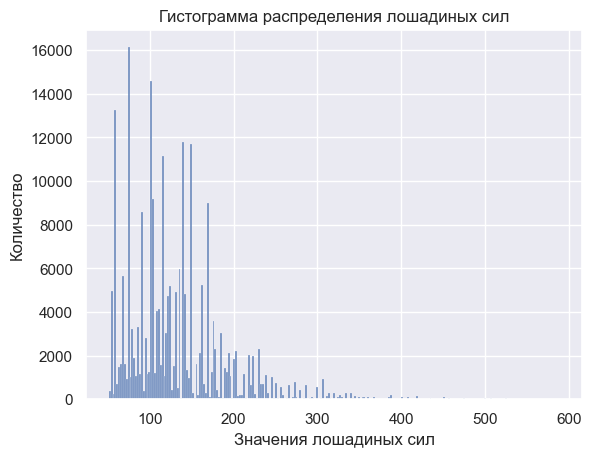

In [19]:
sns.histplot(data.powerPS)
plt.title('Гистограмма распределения лошадиных сил')
plt.xlabel('Значения лошадиных сил')
plt.ylabel('Количество') 

Есть выбросы в правом хвосте, машины с большим числом лошадиных сил встречаются крайне редко

Text(0, 0.5, 'Количество')

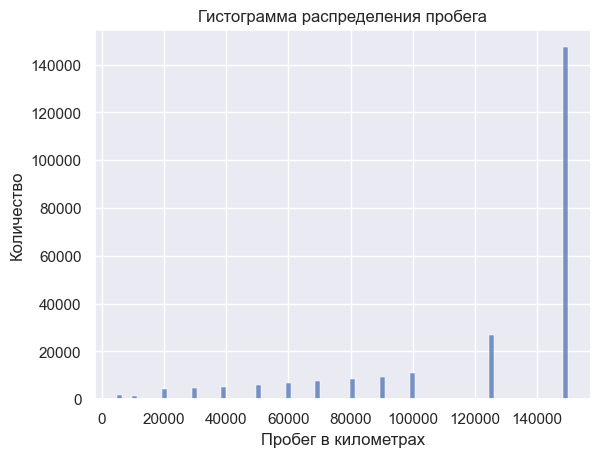

In [20]:
sns.histplot(data.kilometer)
plt.title('Гистограмма распределения пробега')
plt.xlabel('Пробег в километрах')
plt.ylabel('Количество') 

Немного странно, что пробег распределен дискретно. Проверим выбросы.

Text(0.5, 1.0, 'Боксплот распределения пробега')

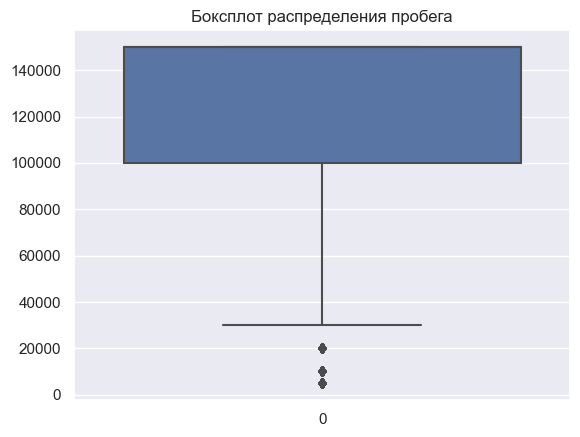

In [21]:
sns.boxplot(data.kilometer)
plt.title('Боксплот распределения пробега')

Видно, что все машины, у которых пробег меньше 35000 являются выбросами

Text(0, 0.5, 'Количество')

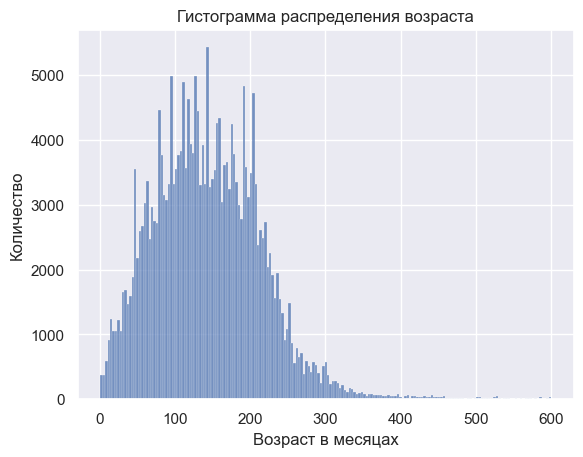

In [22]:
sns.histplot(data.autoAgeMonths)
plt.title('Гистограмма распределения возраста')
plt.xlabel('Возраст в месяцах')
plt.ylabel('Количество') 

Есть тяжелый хвост справа, скорее всего это выбросы. Нагляднее увидим на графике боксплот.

Text(0.5, 1.0, 'Боксплот распределения возраста')

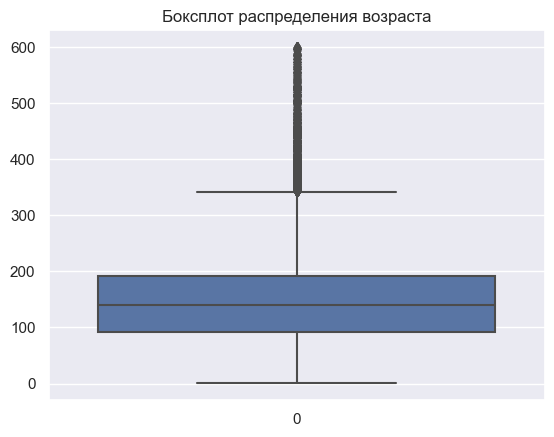

In [23]:
sns.boxplot(data.autoAgeMonths)
plt.title('Боксплот распределения возраста')

Выбросы плотно распределены после ~ 330 

### Теперь перейдем к категориальным признакам

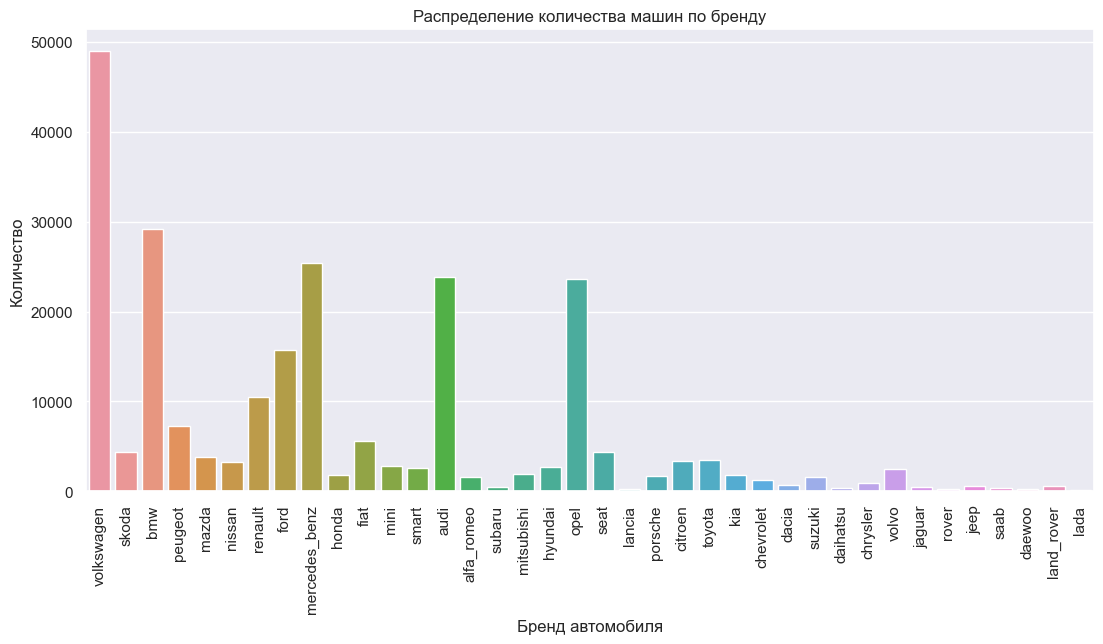

In [24]:
plt.figure(figsize=(13, 6))
sns.countplot(x='brand', data=data)
plt.title('Распределение количества машин по бренду')
plt.xticks(rotation='vertical')
plt.xlabel('Бренд автомобиля')
plt.ylabel('Количество') 
plt.show()

Text(0, 0.5, 'Бренд автомобиля')

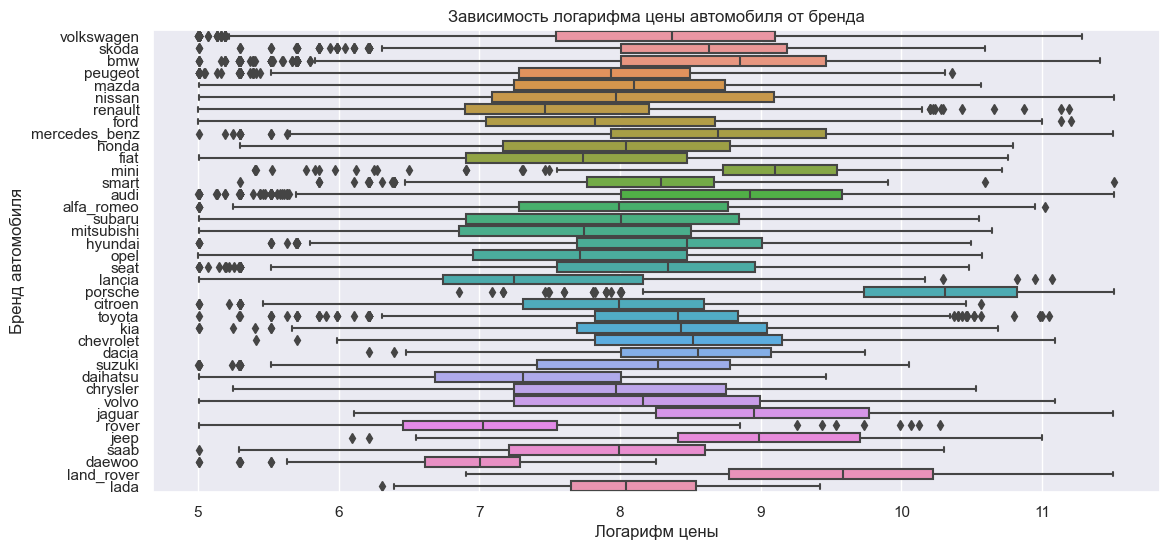

In [25]:
plt.figure(figsize=(13, 6))
sns.boxplot(data, y="brand", x='log_price')
plt.title('Зависимость логарифма цены автомобиля от бренда')
plt.xlabel('Логарифм цены')
plt.ylabel('Бренд автомобиля') 

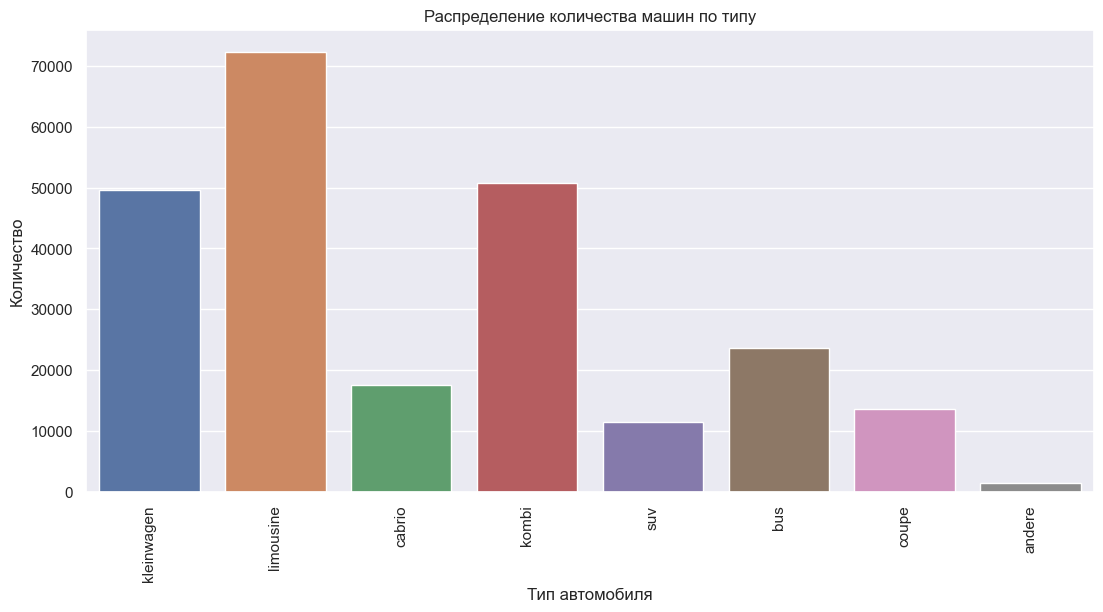

In [26]:
plt.figure(figsize=(13, 6))
sns.countplot(x='vehicleType', data=data)
plt.title('Распределение количества машин по типу')
plt.xticks(rotation='vertical')
plt.xlabel('Тип автомобиля')
plt.ylabel('Количество') 
plt.show()

Text(0, 0.5, 'Тип автомобиля')

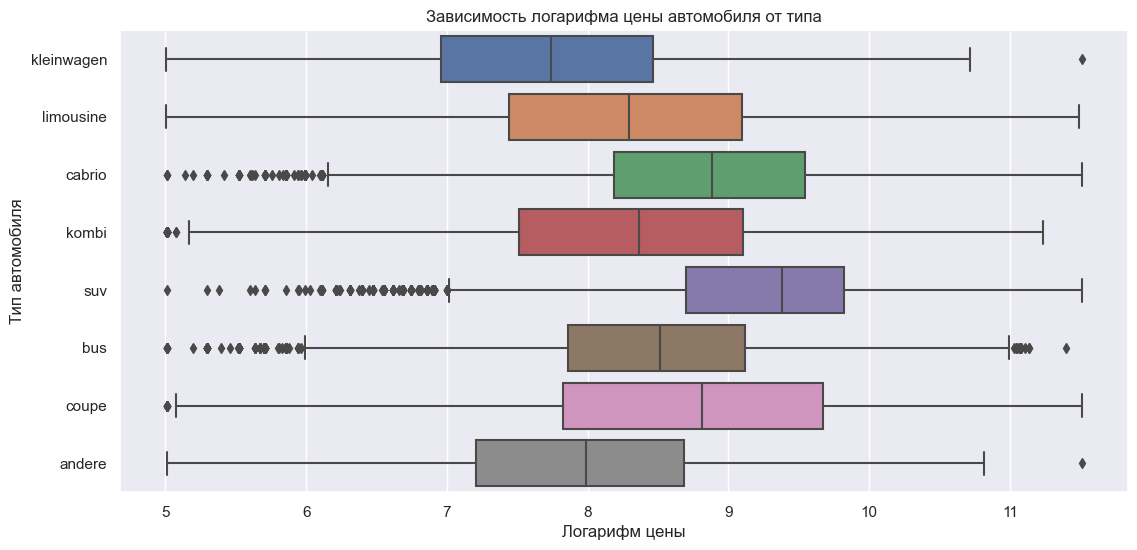

In [27]:
plt.figure(figsize=(13, 6))
sns.boxplot(data, y="vehicleType", x='log_price')
plt.title('Зависимость логарифма цены автомобиля от типа')
plt.xlabel('Логарифм цены')
plt.ylabel('Тип автомобиля') 

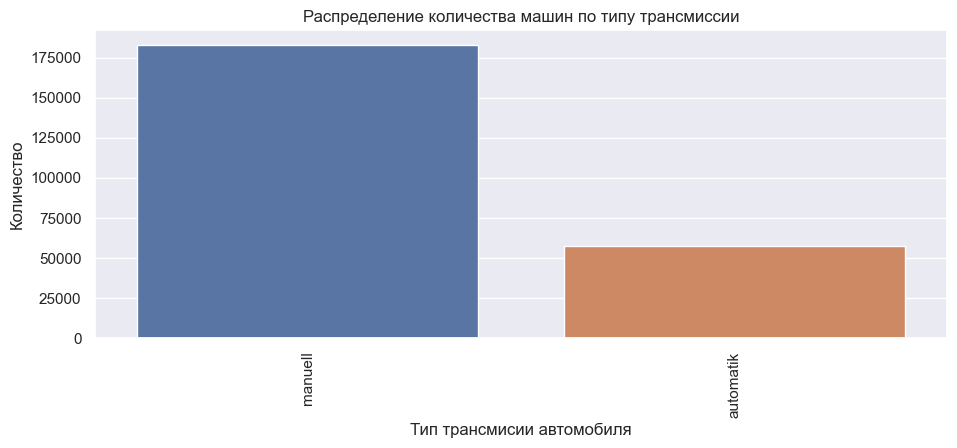

In [28]:
plt.figure(figsize=(11, 4))
sns.countplot(x='gearbox', data=data)
plt.title('Распределение количества машин по типу трансмиссии')
plt.xticks(rotation='vertical')
plt.xlabel('Тип трансмисии автомобиля')
plt.ylabel('Количество') 
plt.show()

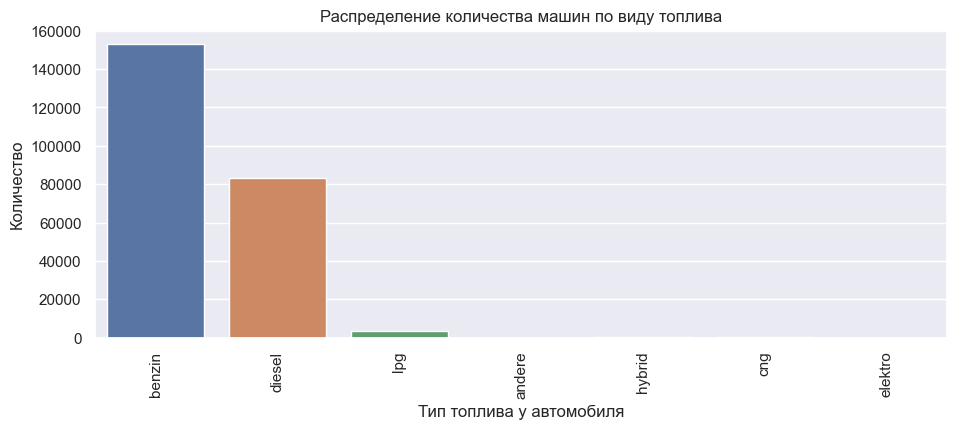

In [29]:
plt.figure(figsize=(11, 4))
sns.countplot(x='fuelType', data=data)
plt.title(f'Распределение количества машин по виду топлива')
plt.xticks(rotation='vertical')
plt.xlabel('Тип топлива у автомобиля')
plt.ylabel('Количество') 
plt.show()

Данный признак будет не очень полезен для нашей модели, так как, в нем в 4 из 7 возможных варивнтов встречаются крайне редко

Text(0, 0.5, 'Тип топлива у автомобиля')

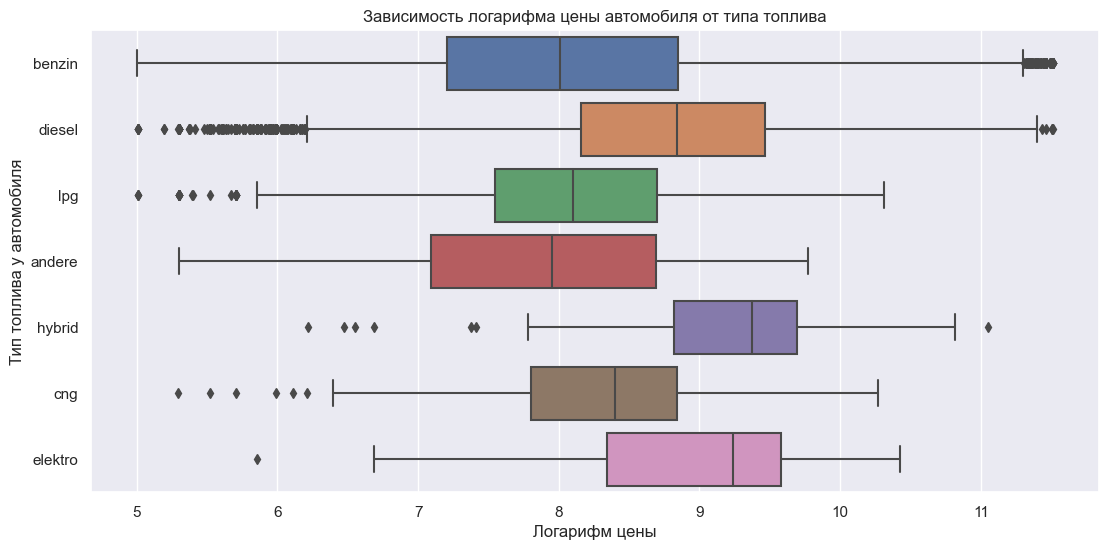

In [30]:
plt.figure(figsize=(13, 6))
sns.boxplot(data, y="fuelType", x='log_price')
plt.title('Зависимость логарифма цены автомобиля от типа топлива')
plt.xlabel('Логарифм цены')
plt.ylabel('Тип топлива у автомобиля') 

In [31]:
data = data.drop('fuelType', axis=1)

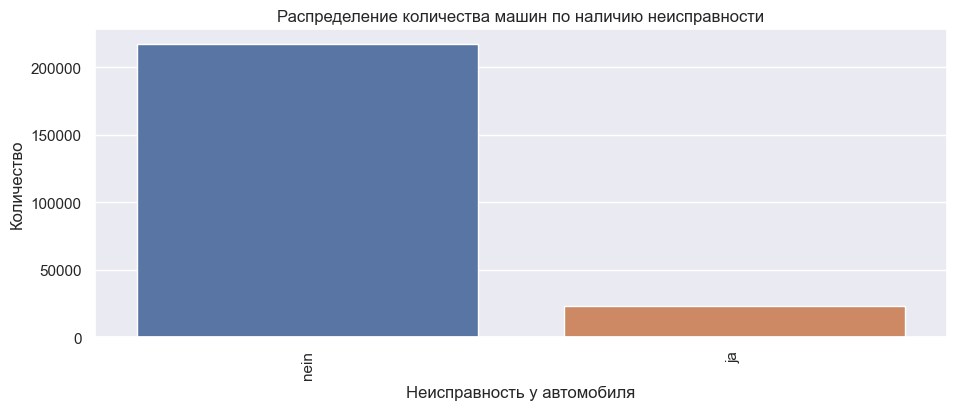

In [32]:
plt.figure(figsize=(11, 4))
sns.countplot(x='notRepairedDamage', data=data)
plt.title('Распределение количества машин по наличию неисправности')
plt.xticks(rotation='vertical')
plt.xlabel('Неисправность у автомобиля')
plt.ylabel('Количество') 
plt.show()

In [33]:
numeric = ['powerPS', 'kilometer', 'autoAgeMonths', 'price']

data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

categorical = ['brand', 'model', 'vehicleType', 'notRepairedDamage', 'gearbox' ]
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['bias']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])



In [35]:
data = data.drop('price', axis=1)


Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1

In [36]:
# YOUR CODE (data split into train/val/test):
train, val, test = \
              np.split(data.sample(frac=1, random_state=42), 
                       [int(.8 * len(data)), int(.9 * len(data))])

Код взят отсюда: [Ссылка](https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [37]:
y_train = train['log_price']
y_val = val['log_price']
y_test = test['log_price']

y_val = y_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

x_train = train.loc[:, train.columns != 'log_price']
x_val = val.loc[:, val.columns != 'log_price']
x_test = test.loc[:, test.columns != 'log_price']

x_val_transform = column_transformer.fit_transform(x_val)
x_train_transform = column_transformer.transform(x_train)
x_test_transform = column_transformer.transform(x_test)


In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from linear_regression import LinearRegression

In [39]:
lambdas = np.logspace(-3, 1, 50)
methods = ('full', 'stochastic', 'momentum', 'adam')



method_type = []
lambda_score = []
val_RMSE = []
train_RMSE = []
test_RMSE = []
val_R_squared = []
train_R_squared = []
test_R_squared = []
iterations = []

try:
    for method in methods:
        for lambda_i in lambdas:
            method_type.append(method)
            lambda_score.append(lambda_i)

            regression_config = {
                'descent_name': method,
                'kwargs': {'dimension': x_val_transform.shape[1], 'lambda_': lambda_i}
            }

            reg = LinearRegression(regression_config)
            model = reg.fit(x_val_transform, y_val)



            val_RMSE.append(mean_squared_error(y_val, model.predict(x_val_transform), squared=False))
            train_RMSE.append(mean_squared_error(y_train, model.predict(x_train_transform), squared=False))
            test_RMSE.append(mean_squared_error(y_test, model.predict(x_test_transform), squared=False))

            val_R_squared.append(r2_score(y_val, model.predict(x_val_transform)))
            train_R_squared.append(r2_score(y_train, model.predict(x_train_transform)))
            test_R_squared.append(r2_score(y_test, model.predict(x_test_transform)))

            iterations.append(len(model.loss_history))
except ValueError:
    pass

C:\Users\Spacelight\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\Spacelight\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\Spacelight\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\Spacelight\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\Users\Spacelight\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (

In [40]:
df = pd.DataFrame(np.column_stack([method_type, lambda_score, val_RMSE, train_RMSE, test_RMSE, val_R_squared, 
                                               train_R_squared, test_R_squared, iterations]), 
                               columns=['method', 'lambda', 'val_RMSE', 'train_RMSE', 'test_RMSE', 'val_R_squared',
                                       'train_R_squared', 'test_R_squared', 'iterations'])

In [41]:
#найдем лучшие лямбды

df['val_R_squared'] = df['val_R_squared'].astype(float) 
df.iloc[df.groupby('method')['val_R_squared'].idxmax()][['method', 'lambda']]

,method,lambda
196,adam,5.689866029018293
41,full,2.2229964825261934
138,momentum,1.2648552168552958
84,stochastic,0.5963623316594643


### Задание 5.2. Сравнение методов (1 балла)
Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [42]:
#максимальное число итераций
df['iterations'].astype(int).max()

301

In [43]:
df['train_RMSE'] = df['train_RMSE'].astype(float)
df['iterations'] = df['iterations'].astype(int)

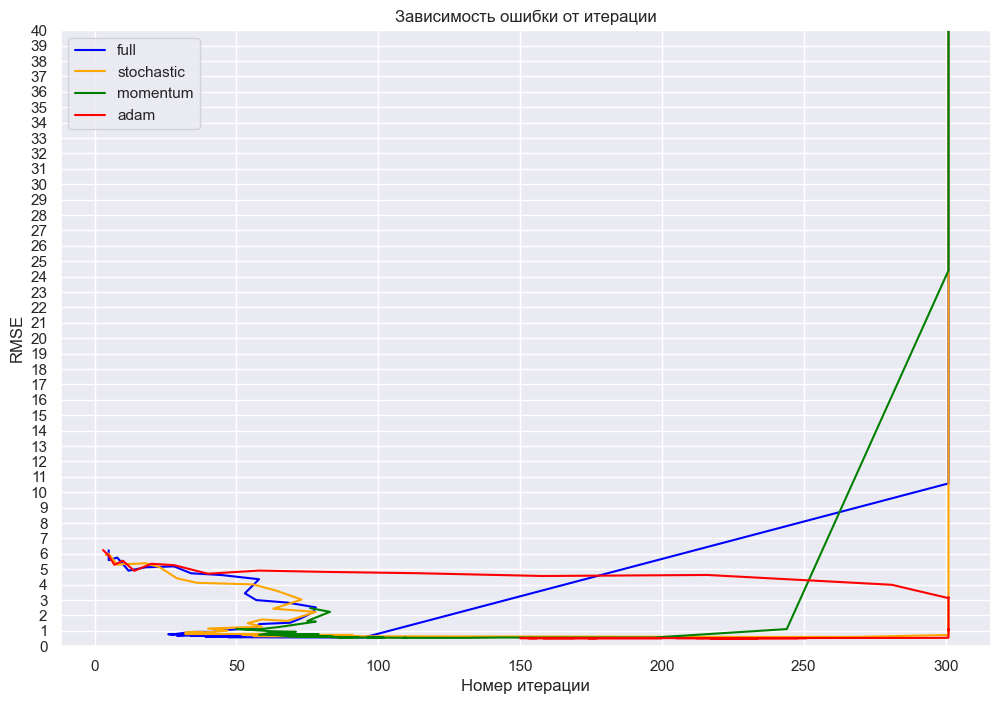

In [44]:
colors = ['blue', 'orange', 'green', 'red']
methods = ['full', 'stochastic', 'momentum', 'adam']

plt.figure(figsize=(12, 8))
plt.ylim(0, 40)
plt.yticks(np.arange(0, 41, 1))

plt.xlabel('Номер итерации')
plt.ylabel('RMSE')
plt.title('Зависимость ошибки от итерации')

for color, method in zip(colors, methods):
    plt.plot(df[df['method'] == method]['iterations'], df[df['method'] == method]['train_RMSE'], label=method, color=color)

plt.legend()



`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [45]:
import time as tm

In [53]:
batch_size = np.arange(1, 1000, 10)

k = 10


size_of_batch = []
time = []
iterations = []
MSE = []


for size in batch_size:
    regression_config = {'descent_name': 'stochastic',
              'kwargs': {'dimension': x_train_transform.shape[1],
                         'lambda_': 0.49417,
                         'batch_size': size}}
    current_MSE = []
    current_time = []
    current_iters = []

    
    
    for _ in range(10):
        regression = LinearRegression(regression_config)
        
        start_time = tm.time()
        
        model = reg.fit(x_train_transform, y_train)
        
        end_time = tm.time()
        
        difference = end_time - start_time
        
        iters = len(model.loss_history) - 0
        
        current_time.append(difference)
        current_iters.append(iters)
        current_MSE.append(float(np.sqrt(model.loss_history[-1])))
        
    size_of_batch.append(size)
    time.append(np.mean(current_time))
    iterations.append(np.mean(current_iters))
    MSE.append(np.mean(current_MSE))

In [54]:
df = pd.DataFrame(np.column_stack([size_of_batch, time, iterations, MSE]), 
                               columns=['size_of_batch', 'time', 'iterations', 'MSE'])
df

,size_of_batch,time,iterations,MSE
0,1.0,0.076721,2410.0,0.521549
1,11.0,0.076622,2430.0,0.521548
2,21.0,0.083415,2450.0,0.521547
3,31.0,0.089508,2470.0,0.521546
4,41.0,0.106191,2490.0,0.521545
...,...,...,...,...
95,951.0,0.091806,4310.0,0.521502
96,961.0,0.087910,4330.0,0.521501
97,971.0,0.080917,4350.0,0.521501
98,981.0,0.080618,4370.0,0.521501


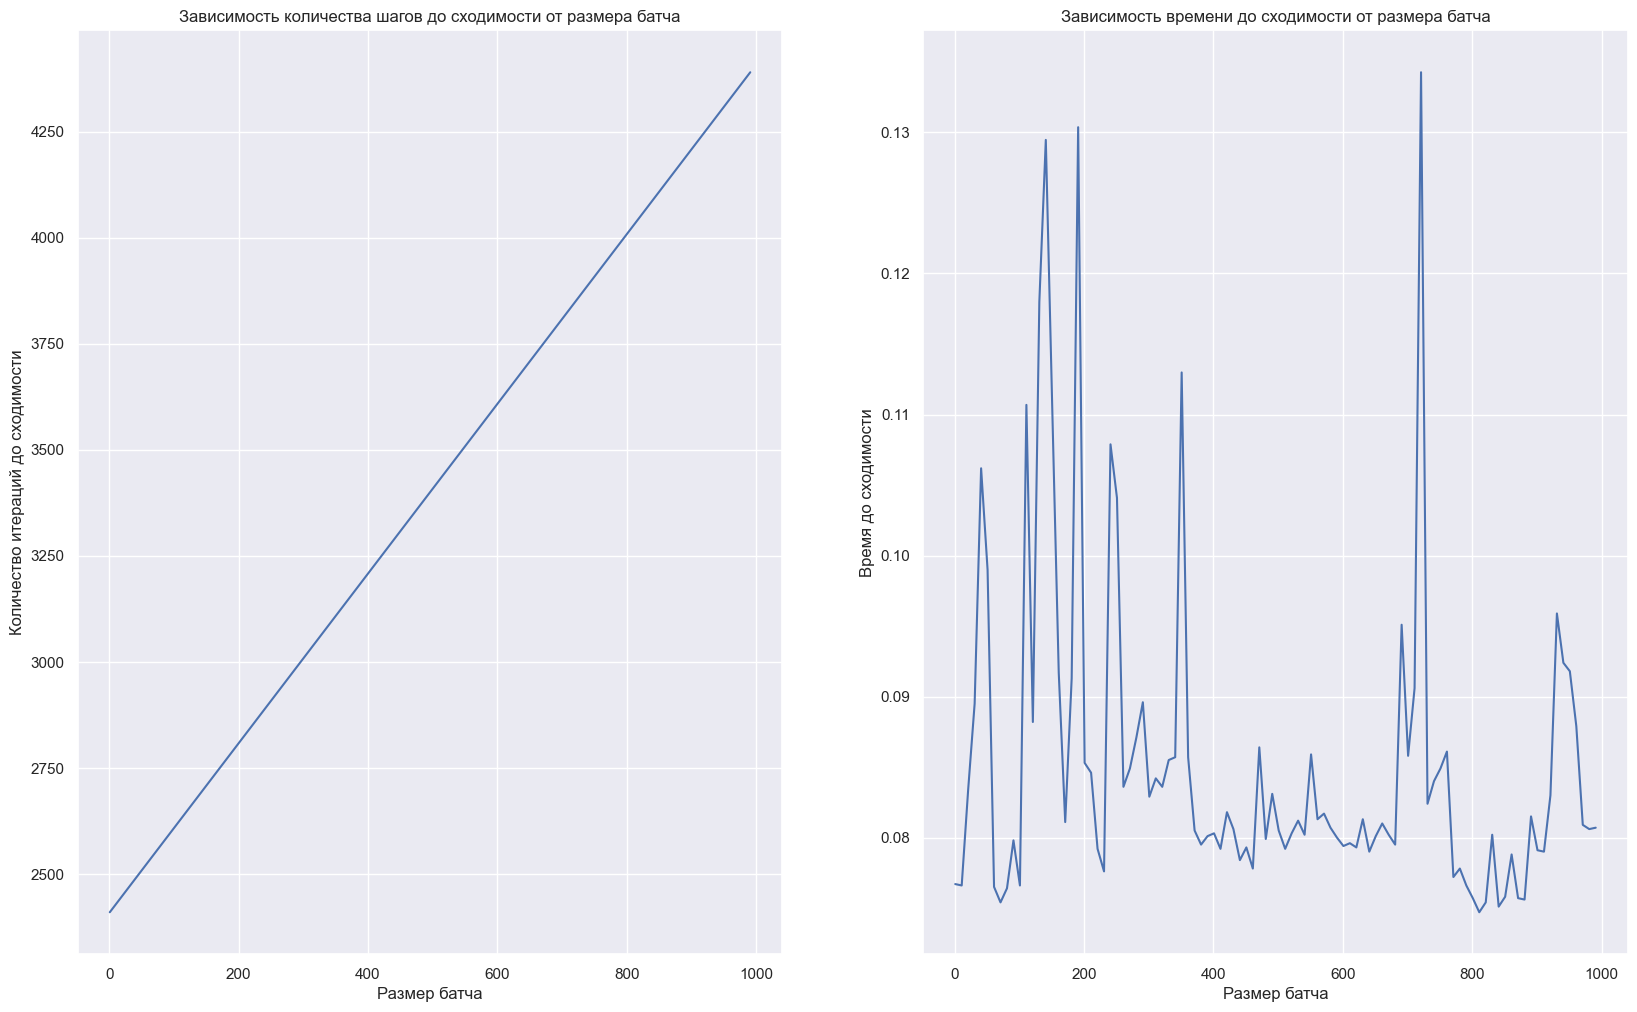

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20, 12))
ax[0].plot(size_of_batch, iterations)
ax[0].set_xlabel('Размер батча')
ax[0].set_ylabel('Количество итераций до сходимости')
ax[0].set_title(
    'Зависимость количества шагов до сходимости от размера батча')

ax[1].plot(size_of_batch, time)
ax[1].set_xlabel('Размер батча')
ax[1].set_ylabel('Время до сходимости')
ax[1].set_title('Зависимость времени до сходимости от размера батча')
plt.show()

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [49]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [50]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

К сожалению, кулинар из меня никакой, но студенческие годы научили меня превосходно готовить доширак. Мало кто знает, но это целое исскуство.

Итак, начнем по этапно.
Нам понадобиться:
+ Доширак (1 штука)
+ Специи по вкусу, желательно кунжут и вьетнамский грибной соевый соус
+ Кипяток


1. К сожалению, доширака не было, но это нам не помешает. 

<img src="iFdPcHIGH_M.jpg" width="400">

2. Добавляем специи по вкусу. Главное - не  нужно высыпать весь пакетик, оставим 20% содержимого на потом.

<img src="fTtCAw9NLXs.jpg" width="400">

3. После того, как лапшичка заварилась, ставим ее в микроволновку на 40-60 секунд. Данная хитрость превращает лапшу в более прозначную, тем самым делая ее внешний вид более необычным. После того, как мы вытащили ее из микроволновки, сливаем бульен и добавляем грибной соевый соус. 

<img src="8aAmfGPxFC4.jpg" width="400">

4. Лапша практически готова, осталось превратить блюдо в более аппетитный вид.

<img src="vhn28bmtHes.jpg" width="400">

Вуаля, азиатская лапша готова!

К прибольшому сожалению, приглашенный гость отказался от фотографии, предпочитая остаться инкогнито. Но могу Вас, уважаемый жюри, заверить, гостю очень понравилось угощение!

Более того, на самом деле, приготовление азиатской лапшички есть некая традиция в моей семье. Так, например, я часто устраиваю романчический ужин со своей женой.

<img src="Без названия.jpg" width="600">

На фото изображена моя довольная жена :)

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [51]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [52]:
# YOUR CODE: